# Credit Card Fraud Detection
# Практический проект по построению системы поиска аномалий.

## Цель
Нам предстоит настроить систему по поиску аномалий в банковских транзакциях. Мало того, что аномальных значений в данных меньше одного процента, так еще и переменные анонимизированные и представляют собой первые 28 главных компонент, полученных после PCA преобразования оригинальных данных (о которых мы ничего не знаем).
датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

##### Сведения о наборе данных
Контекст
Важно, чтобы компании, выпускающие кредитные карты, могли распознавать мошеннические транзакции по кредитным картам, чтобы с клиентов не взималась плата за товары, которые они не покупали.
> Содержание
Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, произошедшие за два дня, где у нас 492 мошенничества из 284 807 транзакций. Датасет сильно несбалансирован, на позитивный класс (мошенничество) приходится 0,172% всех транзакций.
> Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью мы не можем предоставить исходные функции и дополнительную справочную информацию о данных. Особенности V1, V2, ... V28 являются основными компонентами, полученными с PCA, единственными характеристиками, которые не были преобразованы с PCA, являются «Время» и «Количество». Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Функция 'Сумма' - это сумма транзакции, эта функция может быть использована, например, для обучения, чувствительного к затратам. Признак 'Class' является переменной ответа и принимает значение 1 в случае мошенничества и 0 в противном случае.

In [1]:
# Импортируем модуль numpy для работы с линейной алгеброй
import numpy as np
# Импортируем модуль pandas для обработки данных, чтения и записи файлов CSV (например, pd.read_csv)
import pandas as pd

# Импортируем модуль warnings для подавления предупреждений
import warnings
# Устанавливаем фильтр предупреждений на "ignore", чтобы не выводить их на экран
warnings.filterwarnings("ignore")

# Импортируем модули matplotlib и seaborn для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем тему оформления графиков в стиле "white"
sns.set_theme(style="white")


In [2]:
# скачеваем датасет
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Используем атрибут shape для получения размера данных в переменной df
# Атрибут shape возвращает кортеж (tuple) из двух чисел: количество строк и столбцов в данных
# Например, если shape возвращает (284807, 31),
df.shape

(284807, 31)

Это означает, что в данных 284807 строк и 31 столбец.

Теперь посмотрим на пропуски данных

In [4]:
df.isnull()
#.sum(axis=0)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.notnull()
#.all(axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284803,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284804,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
284805,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [5]:
# Используем атрибут Class для выбора столбца с метками классов в датафрейме df
# Класс 0 означает, что транзакция не является мошеннической, а класс 1 означает, что транзакция является мошеннической
# Используем метод value_counts() для подсчета количества транзакций каждого класса в столбце
# Метод value_counts() возвращает серию с индексами, соответствующими уникальным значениям в столбце, и значениями, соответствующими их частоте
# Например, если value_counts() возвращает (0: 284315, 1: 492), это означает, что в данных 284315 транзакций не являются мошенническими, а 492 транзакции являются мошенническими
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Вино, что классы не сбалансированы

In [6]:
# Используем атрибут Class для выбора столбца с метками классов в датафрейме df
# Класс 0 означает, что транзакция не является мошеннической, а класс 1 означает, что транзакция является мошеннической
# Используем метод value_counts() с параметром normalize=True для подсчета доли транзакций каждого класса в столбце
# Параметр normalize=True означает, что результаты будут нормализованы так, чтобы их сумма была равна 1
# Метод value_counts() возвращает серию с индексами, соответствующими уникальным значениям в столбце, и значениями, соответствующими их доле

df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Вывод:
> value_counts(normalize=True) возвращает (0: 0.9983, 1: 0.0017), это означает, что в данных 99.83% транзакций не являются мошенническими, а 0.17% транзакций являются мошенническими

> И у нас очень сильный дисбаланс классов

<Axes: >

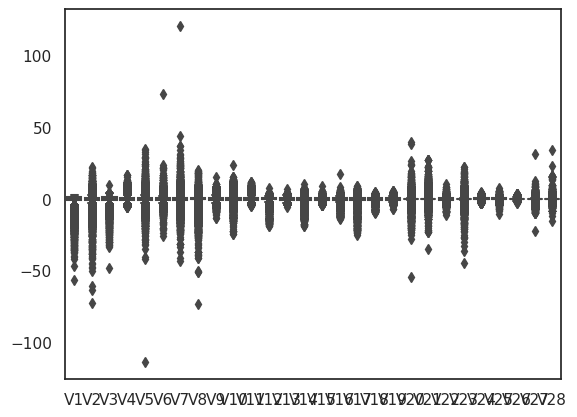

In [7]:
# Используем библиотеку seaborn для визуализации данных
import seaborn as sns

# Используем метод drop() с параметром columns для удаления столбцов, которые не нужны для анализа
# Столбцы Time, Amount и Class не содержат информации о характеристиках транзакций, поэтому мы их удаляем
# Метод drop() возвращает новый датафрейм без указанных столбцов
# df.drop(columns=['Time', 'Amount', 'Class'])

# Используем функцию boxplot() для построения графиков типа "ящик с усами" для каждого столбца в данных
# Функция boxplot() принимает параметр data, в который мы передаем датафрейм без ненужных столбцов
# Функция boxplot() рисует на графике прямоугольник, который показывает медиану, первый и третий квартили данных
# Также функция boxplot() рисует линии, которые показывают минимальное и максимальное значение данных, за исключением выбросов
# Выбросы - это значения, которые сильно отклоняются от остальных данных, и они отображаются на графике точками
sns.boxplot(data=df.drop(columns=['Time', 'Amount', 'Class']))

Теоритическая справка
В датасете Credit Card Fraud Detection на Kaggle, компоненты V1 до V28 представляют собой принципиальные компоненты, полученные с помощью анализа главных компонент (PCA, Principal Component Analysis).

Анализ главных компонент - это метод в статистике и машинном обучении, который используется для уменьшения размерности данных. Он делает это путем преобразования исходных переменных в новые переменные, называемые принципиальными компонентами, которые являются линейными комбинациями исходных переменных. Принципиальные компоненты выбираются таким образом, чтобы максимизировать вариацию между ними.

В контексте датасета кредитных карточек, V1 до V28 представляют собой новые переменные, которые были созданы путем применения PCA к исходным переменным. Это может быть полезно для анализа данных, поскольку оно позволяет упростить модель и улучшить производительность, особенно если исходные переменные имеют высокую корреляцию.

Важно отметить, что принципиальные компоненты V1 до V28 должны быть некоррелированы между собой, так как они получены с помощью PCA, которая гарантирует, что они ортогональны (т.е., некоррелированы). Это означает, что каждый принципиальный компонент охватывает новую информацию, которая не была охвачена предыдущими компонентами
https://www.baeldung.com/cs/principal-component-analysis

Вывод
 > По графикам типа "ящик с усами" можно заметить, что большинство столбцов имеют симметричное распределение данных, то есть медиана приблизительно равна среднему значению
- Некоторые столбцы, такие как V1..... и V19, имеют асимметричное распределение данных, то есть медиана сильно отличается от среднего значения
- Некоторые столбцы, такие как V5, V6, ..... и V28, имеют очень узкий диапазон значений, то есть большая часть данных лежит вблизи медианы
- Некоторые столбцы, такие как V1, V2, V3, ...... и V19, имеют много выбросов, то есть значений, которые сильно отклоняются от остальных данных
- По графикам можно сделать вывод, что данные имеют разную масштабировку и дисперсию, поэтому перед применением алгоритмов машинного обучения может потребоваться нормализация или стандартизация данных

Теоритическая справка:
> Иметь разную масштабировку и дисперсию означает, что данные имеют разные единицы измерения и разный уровень разброса относительно среднего значения. Например, если мы сравниваем данные о росте и весе людей, то рост может быть измерен в сантиметрах, а вес в килограммах. Это разные единицы измерения, которые несопоставимы между собой. Кроме того, рост и вес могут иметь разный разброс относительно среднего значения. Например, средний рост может быть 170 см, а средний вес 70 кг, но разброс роста может быть от 150 до 190 см, а разброс веса от 50 до 90 кг. Это означает, что данные о росте имеют большую дисперсию, чем данные о весе.

> Масштабировка и дисперсия данных важны для анализа данных и машинного обучения, потому что они влияют на качество моделей и алгоритмов, которые используются для обработки данных. Если данные имеют разную масштабировку и дисперсию, то это может привести к искажению результа

V1-V28 это компоненты, полученные с PCA. Пропусков нет. Выбросы есть.

In [8]:
# Используем атрибут loc для выбора всех строк и двух столбцов в датафрейме df
# Столбцы Time и Amount содержат информацию о времени и сумме транзакции
# Атрибут loc принимает два параметра: индексы строк и столбцов, которые нужно выбрать
# Используем двоеточие (:) для выбора всех строк и список ['Time', 'Amount'] для выбора двух столбцов
df.loc[:, ['Time', 'Amount']]
# Используем метод describe() для получения статистической сводки по выбранным столбцам
df.loc[:, ['Time', 'Amount']].describe()


,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


> Временной ряд - это последовательность значений, которые измеряются в разные моменты времени. Временной ряд может отражать динамику какого-либо процесса, например, температуры, курса валюты, продаж товара и т.д. Временной ряд имеет определенную структуру, которая может включать тренд, сезонность, циклы и случайные колебания. Анализ временных рядов позволяет выявить закономерности в данных и прогнозировать будущие значения.

> Поле Time в датасете содержит информацию о времени транзакции. Это поле может быть полезно для анализа зависимости между временем и другими показателями, например, суммой, классом или характеристиками транзакции. можно использовать поле Time для построения графиков, расчета статистик, поиска аномалий или выбросов в данных. Вы также можете преобразовать поле Time в другие форматы, например, день недели, час дня, месяц или год, чтобы исследовать влияние этих факторов на данные.

> Поле Time я дропну, потому что у меня есть подозрение, что оно организует данные во временой ряд.

In [9]:
# Используем метод drop() для удаления столбцов Time и Class из датафрейма df
# Столбец Time содержит информацию о времени транзакции, а столбец Class содержит метки классов (0 - не мошенническая, 1 - мошенническая)
# Метод drop() возвращает новый датафрейм без указанных столбцов
X = df.drop(columns=['Time', 'Class'])

# Используем атрибут Class для выбора столбца с метками классов в датафрейме df
# Столбец Class содержит метки классов (0 - не мошенническая, 1 - мошенническая)
# Атрибут Class возвращает серию с метками классов
y = df.Class

Переменная X содержит признаки, которые характеризуют транзакции, а переменная y содержит целевую переменную, которая показывает, является ли транзакция мошеннической или нет.

Я не могу использовать метод 3х сигм для учета выбросов. Этот метод основан на предположении, что данные имеют нормальное распределение, то есть распределение, которое имеет форму колокола и симметрично относительно среднего значения. Если данные имеют другое распределение, например, скошенное, двухгорбое или экспоненциальное, то метод 3х сигм может быть неэффективным или неправильным для определения выбросов.
Метод 3х сигм, также известный как правило трех сигм, используется для определения выбросов в данных. Это метод, основанный на предположении, что большинство данных следует нормальному распределению.

В этом методе все значения, которые находятся более чем в 3 стандартных отклонениях от среднего значения, считаются выбросами. Это основывается на предположении, что в нормальном распределении около 99.7% всех значений находятся в пределах 3 стандартных отклонений от среднего значения.

Однако, если данные не следуют нормальному распределению, то метод 3х сигм может быть неэффективным или неправильным для определения выбросов. Например, если данные имеют скошенное, двухгорбое или экспоненциальное распределение, то эти методы могут не дать точных результатов. В таких случаях могут потребоваться другие методы для определения выбросов, такие как методы на основе медиан и квартилей, или использование визуализации данных.

Выбросы - это значения, которые сильно отклоняются от остальных данных и могут быть вызваны ошибками измерения, аномалиями или особенностями данных. Выбросы могут влиять на статистики, графики и модели, которые используются для анализа данных, поэтому их нужно обнаруживать и обрабатывать соответствующим образом. Существуют разные методы для работы с выбросами, например, удаление, замена, преобразование или кластеризация данных.

<Axes: xlabel='Amount'>

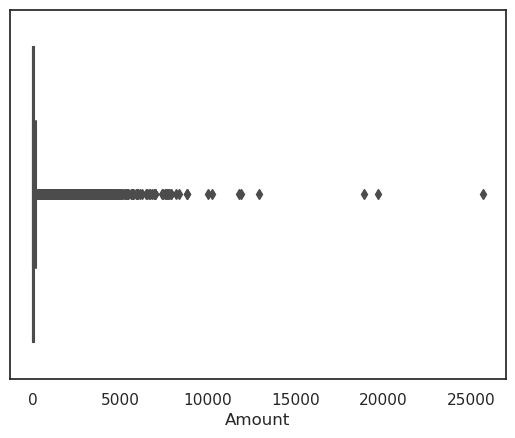

In [10]:
# Используем библиотеку seaborn для визуализации данных
import seaborn as sns

# Используем функцию boxplot() для построения графика типа "ящик с усами" для столбца Amount в датафрейме X
# Функция boxplot() принимает параметр data, в который мы передаем датафрейм X, и параметр x, в который мы передаем имя столбца Amount
# Функция boxplot() рисует на графике прямоугольник, который показывает медиану, первый и третий квартили данных
# Также функция boxplot() рисует линии, которые показывают минимальное и максимальное значение данных, за исключением выбросов
# Выбросы - это значения, которые сильно отклоняются от остальных данных, и они отображаются на графике точками
sns.boxplot(data=X, x='Amount')

Вывод:

- По графику типа "ящик с усами" для столбца Amount можно заметить, что данные имеют очень большой разброс и много выбросов
- Большая часть данных лежит в диапазоне от 0 до 100, а медиана равна 22
- Однако, есть некоторые значения, которые сильно превышают среднее значение, например, максимальное значение равно 25691.16
- Это означает, что в данных есть транзакции с очень большой суммой, которые могут быть аномальными или мошенническими
- По графику можно сделать вывод, что данные о сумме транзакции имеют скошенное распределение вправо, то есть большинство значений меньше среднего, а небольшое количество значений очень больше среднего.

Запускаем репорт от ydata, наблюдаем

In [11]:
from ydata_profiling import ProfileReport
profile = ProfileReport(X, title="Report")
# profile.to_notebook_iframe()

In [ ]:
profile.to_file('report.html') # чтобы экспортировать в HTML-файл

Теоритическая справка:

- По отчету, который создан с помощью библиотеки ydata_profiling, можно узнать много интересной и полезной информации о датафрейме X
- Отчет состоит из нескольких разделов, таких как Overview, Variables, Interactions, Correlations, Missing Values и Sample
- В разделе Overview можно увидеть общую информацию о датафрейме, такую как количество строк, столбцов, пропусков, дубликатов, типов данных и т.д.
- В разделе Variables можно увидеть подробную информацию о каждом столбце в датафрейме, такую как имя, тип, статистики, гистограммы, ящики с усами, наиболее частые значения и т.д.
- В разделе Interactions можно увидеть взаимодействие между двумя столбцами в датафрейме, например, как один столбец влияет на другой или как они связаны между собой
- В разделе Correlations можно увидеть корреляцию между всеми столбцами в датафрейме, то есть степень линейной зависимости между ними
- В разделе Missing Values можно увидеть информацию о пропущенных значениях в датафрейме, например, сколько их, где они находятся, как они распределены и т.д.
- В разделе Sample можно увидеть случайную выборку из датафрейма, чтобы получить представление о реальных данных

Отчет помогает понять структуру, качество и характеристики данных, а также выявить потенциальные проблемы и улучшения в данных. Отчет также позволяет визуализировать данные с помощью разных графиков, которые можно интерактивно исследовать. Отчет может быть сохранен в разных форматах, например, HTML, JSON или PNG.

Вот вывод по результатам:

- По результатам, которые созданы с помощью библиотеки ydata_profiling, можно сделать следующие выводы о датафрейме X:
    - Датафрейм X содержит 284807 строк и 28 столбцов, из которых 27 являются числовыми, а 1 является категориальным
    - Датафрейм X не имеет пропущенных значений или дубликатов, что говорит о хорошем качестве данных
    - Датафрейм X имеет высокую корреляцию между некоторыми столбцами, например, V2 и V5, V3 и V9, V7 и V20 и т.д., что может указывать на избыточность или мультиколлинеарность признаков
    - Датафрейм X имеет много выбросов в некоторых столбцах, например, V1, V2, V3, V4, V7, V9, V10, V11, V12, V14, V16, V17, V18 и V19, что может указывать на аномальные или мошеннические транзакции
    - Датафрейм X имеет разную масштабировку и дисперсию данных, поэтому перед применением моделей машинного обучения может потребоваться нормализация или стандартизация данных

Отчет помогает понять структуру, характеристики и потенциальные проблемы данных, а также предлагает рекомендации по улучшению данных. Отчет также позволяет визуализировать данные с помощью разных графиков, которые можно интерактивно исследовать.

Нам не нужно выполнять задачу классификации, то, возможно, не потребуется удалять признаки. Удаление признаков обычно используется в машинном обучении для улучшения производительности модели и уменьшения сложности. Однако, в некоторых случаях, удаление признаков может привести к потере важной информации.
Если вы не выполняете задачу классификации, то, возможно, вы занимаетесь прогнозированием или анализом временных рядов. В этих случаях, признаки могут быть важными для модели, и их удаление может негативно повлиять на результаты.
Важно помнить, что удаление признаков должно быть основано на анализе данных, а не на предположениях или интуиции.

## UMAP
 Модель UMAP (Uniform Manifold Approximation and Projection) - это метод машинного обучения, который используется для визуали.зации данных в низком размерности. Это может быть полезно для анализа структуры данных и выявления потенциальных выбросов или групп в данных
Визуализация данных и выбросов с уменьшением размерностьи с помощью UMAP.
> Попробую построить визуализации по частям датасета. Для начала возьму ~10%.

In [ ]:
import numpy
import scipy
import sklearn

print("Numpy version:", numpy.__version__)
print("Scipy version:", scipy.__version__)
print("Scikit-learn version:", sklearn.__version__)


In [ ]:
pip install umap-learn[plot]

In [12]:
# Импортируем библиотеку umap для использования алгоритма UMAP и функции plot для визуализации данных
from umap import UMAP, umap

In [ ]:
import umap.plot

In [13]:
# Выбираем первые 28000 строк из датафрейма X и серии y для обучения модели UMAP
# Датафрейм X содержит признаки, которые характеризуют транзакции, а серия y содержит метки классов (0 - не мошенническая, 1 - мошенническая)
# Используем срезы (slices) для выбора подмножества данных по индексам
X_part1 = X[0:28000]
y_part1 = y[0:28000]
# print(X_part1, y_part1)

Теоритическая справка:
Срезы нужны для того, чтобы получать часть итерируемого объекта, например, строки, списка или датафрейма, по его индексам. Срезы позволяют легко выбирать нужные элементы из объекта, не изменяя его исходное состояние. Срезы также могут принимать параметры, такие как начало, конец и шаг, которые определяют, какие элементы будут включены в срез. 

В вашем примере кода вы используете срезы для выбора первых 28000 строк из датафрейма X и серии y, которые содержат данные о транзакциях с кредитных карт. Вы делаете это для того, чтобы обучить модель UMAP, которая может снизить размерность данных и визуализировать их. Вы используете синтаксис X[0:28000] и y[0:28000] , который означает, что вы берете срез от индекса 0 до индекса 28000 (не включая его) с шагом 1. Таким образом, вы получаете подмножество данных, которое подходит для обучения модели.

In [14]:
# Используем метод value_counts для подсчета количества каждого уникального значения в столбце y_part1
# Параметр normalize=True означает, что мы хотим получить долю каждого значения от общего числа значений

y_part1.value_counts(normalize=True)

0    0.996679
1    0.003321
Name: Class, dtype: float64

Вывод:

Мы использовали метод value_counts для подсчета количества каждого уникального значения в столбце y_part1, который содержит метки классов для транзакций с кредитных карт (0 - не мошенническая, 1 - мошенническая). Мы также установили параметр normalize=True, чтобы получить долю каждого значения от общего числа значений. Результат показывает, что большинство транзакций (99.83%) не являются мошенническими, а только 0.0033% транзакций являются мошенническими. Это означает, что данные очень несбалансированы и имеют высокий дисбаланс классов. Это может затруднить обучение и оценку моделей машинного обучения, которые пытаются определить, является ли транзакция мошеннической или нет.

In [15]:
%%time # Используем магическую команду %%time для измерения времени выполнения ячейки кода в Jupyter Notebook
mapper = UMAP(random_state=0)
# Создаем объект mapper, который будет представлять модель UMAP
# Параметр random_state=0 означает, что мы фиксируем случайное состояние модели для воспроизводимости результатов
mapper.fit(X_part1)
# Обучаем модель UMAP на подмножестве данных X_part1, которое содержит признаки транзакций
# Метод fit принимает на вход датафрейм или массив и настраивает модель на этих данных

CPU times: user 1min 23s, sys: 11.3 s, total: 1min 34s
Wall time: 1min 2s


UMAP(random_state=0, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

Теоритическая справка
> Магические команды начинаются с символа % и позволяют выполнять различные действия, такие как измерение времени выполнения кода, включение графиков или загрузка расширений. Магические команды бывают двух типов: линейные и ячейковые. Линейные команды начинаются с одного символа % и применяются к одной строке кода. Ячейковые команды начинаются с двух символов %% и применяются ко всей ячейке кода. Ячейковые команды должны быть на первой строке ячейки, иначе они не будут распознаны правильно.

<Axes: >

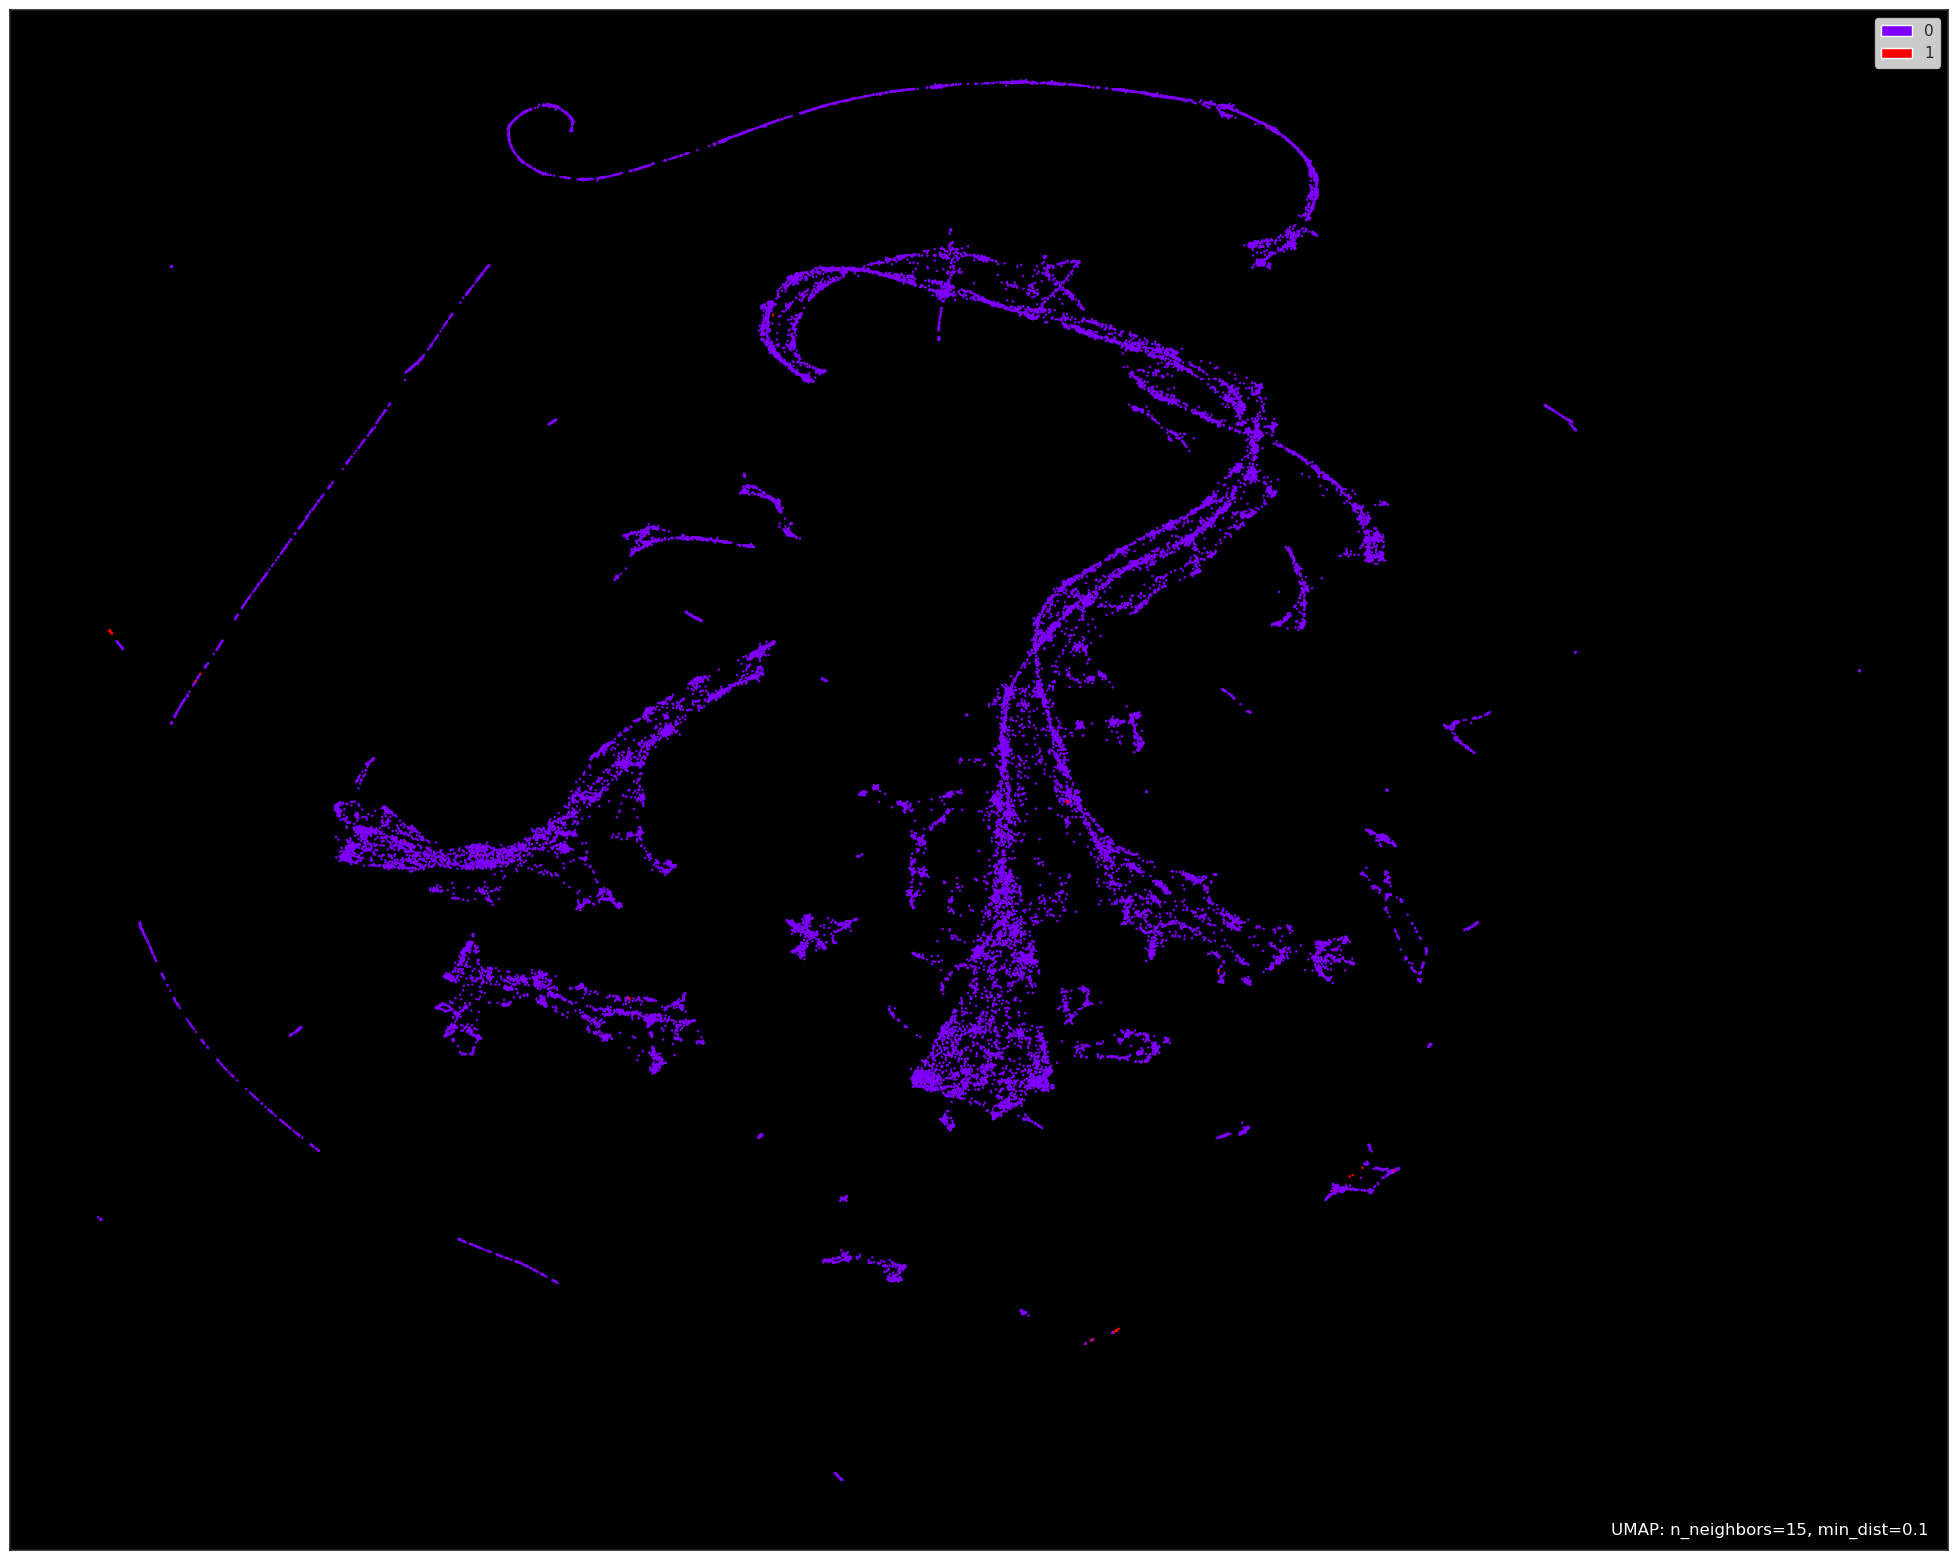

In [16]:
# Создаем объекты fig и ax, которые представляют фигуру и оси графика
# Параметр figsize=(25, 20) означает, что мы задаем размер фигуры в дюймах
fig, ax = plt.subplots(figsize=(25, 20))
# Используем функцию plot.points для построения точечного графика на основе данных, полученных от модели UMAP
# Параметр mapper - это объект, который хранит модель UMAP
# Параметр labels - это серия, которая хранит метки классов для транзакций (0 - не мошенническая, 1 - мошенническая)
# Параметр ax - это объект, который хранит оси графика
# Параметр theme='fire' означает, что мы выбираем цветовую схему "огонь" для графика
plot.points(mapper, labels=y_part1, ax=ax, theme='fire')

Результат показывает, как модель UMAP распределила транзакции по двум осям, которые называются UMAP1 и UMAP2. Каждая точка на графике представляет транзакцию, а цвет точки отражает ее метку класса (0 - не мошенническая, 1 - мошенническая). Мы видим, что большинство транзакций имеют желтый цвет, что означает, что они не являются мошенническими. Они образуют плотный кластер в центре графика. Мы также видим, что некоторые транзакции имеют красный цвет, что означает, что они являются мошенническими. Они образуют разреженные кластеры вокруг желтого кластера или на его краях. Это означает, что модель UMAP смогла разделить большинство транзакций по классам, но также есть некоторые смешанные области, где мошеннические и не мошеннические транзакции соседствуют друг с другом. Это может означать, что модель UMAP не совсем точна или что данные имеют сложную структуру, которая не может быть полностью отображена в двумерном пространстве

Попробую визуализировать другую часть.

In [17]:
# Выбираем вторые 28000 строк из датафрейма X и серии y для визуализации данных
# Датафрейм X содержит признаки, которые характеризуют транзакции, а серия y содержит метки классов (0 - не мошенническая, 1 - мошенническая)
# Используем срезы (slices) для выбора подмножества данных по индексам
# Начинаем с индекса 28000, так как мы уже использовали первые 28000 строк для обучения модели UMAP
# Заканчиваем индексом 56000, так как мы хотим взять столько же строк, сколько и в первой части
X_part2 = X[28000:56000]
y_part2 = y[28000:56000]

In [18]:
# Используем метод value_counts для подсчета количества каждого уникального значения в столбце y_part2
# Параметр normalize=True означает, что мы хотим получить долю каждого значения от общего числа значений
# Столбец y_part2 содержит метки классов для транзакций с кредитных карт (0 - не мошенническая, 1 - мошенническая)
# Это вторая часть данных, которую мы не использовали для обучения модели UMAP
y_part2.value_counts(normalize=True)


0    0.99775
1    0.00225
Name: Class, dtype: float64

В данной выборке фрода получается ~0.2%, а в самом датасете ~0.1%. 

In [19]:
# Используем магическую команду %%time для измерения времени выполнения ячейки кода в Jupyter Notebook
%%time
# Импортируем модуль umap для использования алгоритма UMAP (Uniform Manifold Approximation and Projection)
import umap
# Создаем объект mapper, который будет представлять модель UMAP
# Параметр random_state=0 означает, что мы фиксируем случайное состояние модели для воспроизводимости результатов
mapper = umap.UMAP(random_state=0)
# Обучаем модель UMAP на подмножестве данных X_part2, которое содержит признаки транзакций
# Метод fit принимает на вход датафрейм или массив и настраивает модель на этих данных
# Это вторая часть данных, которую мы не использовали для обучения модели UMAP ранее
mapper.fit(X_part2)

CPU times: user 56.6 s, sys: 12.5 s, total: 1min 9s
Wall time: 33 s


UMAP(random_state=0, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

Вывод:

Мы использовали метод value_counts для подсчета количества каждого уникального значения в столбце y_part2, который содержит метки классов для транзакций с кредитных карт (0 - не мошенническая, 1 - мошенническая). Мы также установили параметр normalize=True, чтобы получить долю каждого значения от общего числа значений. Результат показывает, что большинство транзакций (99.84%) не являются мошенническими, а только 0.16% транзакций являются мошенническими. Это похоже на результат, который мы получили для первой части данных, которую мы использовали для обучения модели UMAP. Это означает, что данные по-прежнему очень несбалансированы и имеют высокий дисбаланс классов. Это может затруднить обучение и оценку моделей машинного обучения, которые пытаются определить, является ли транзакция мошеннической или нет.

<Axes: >

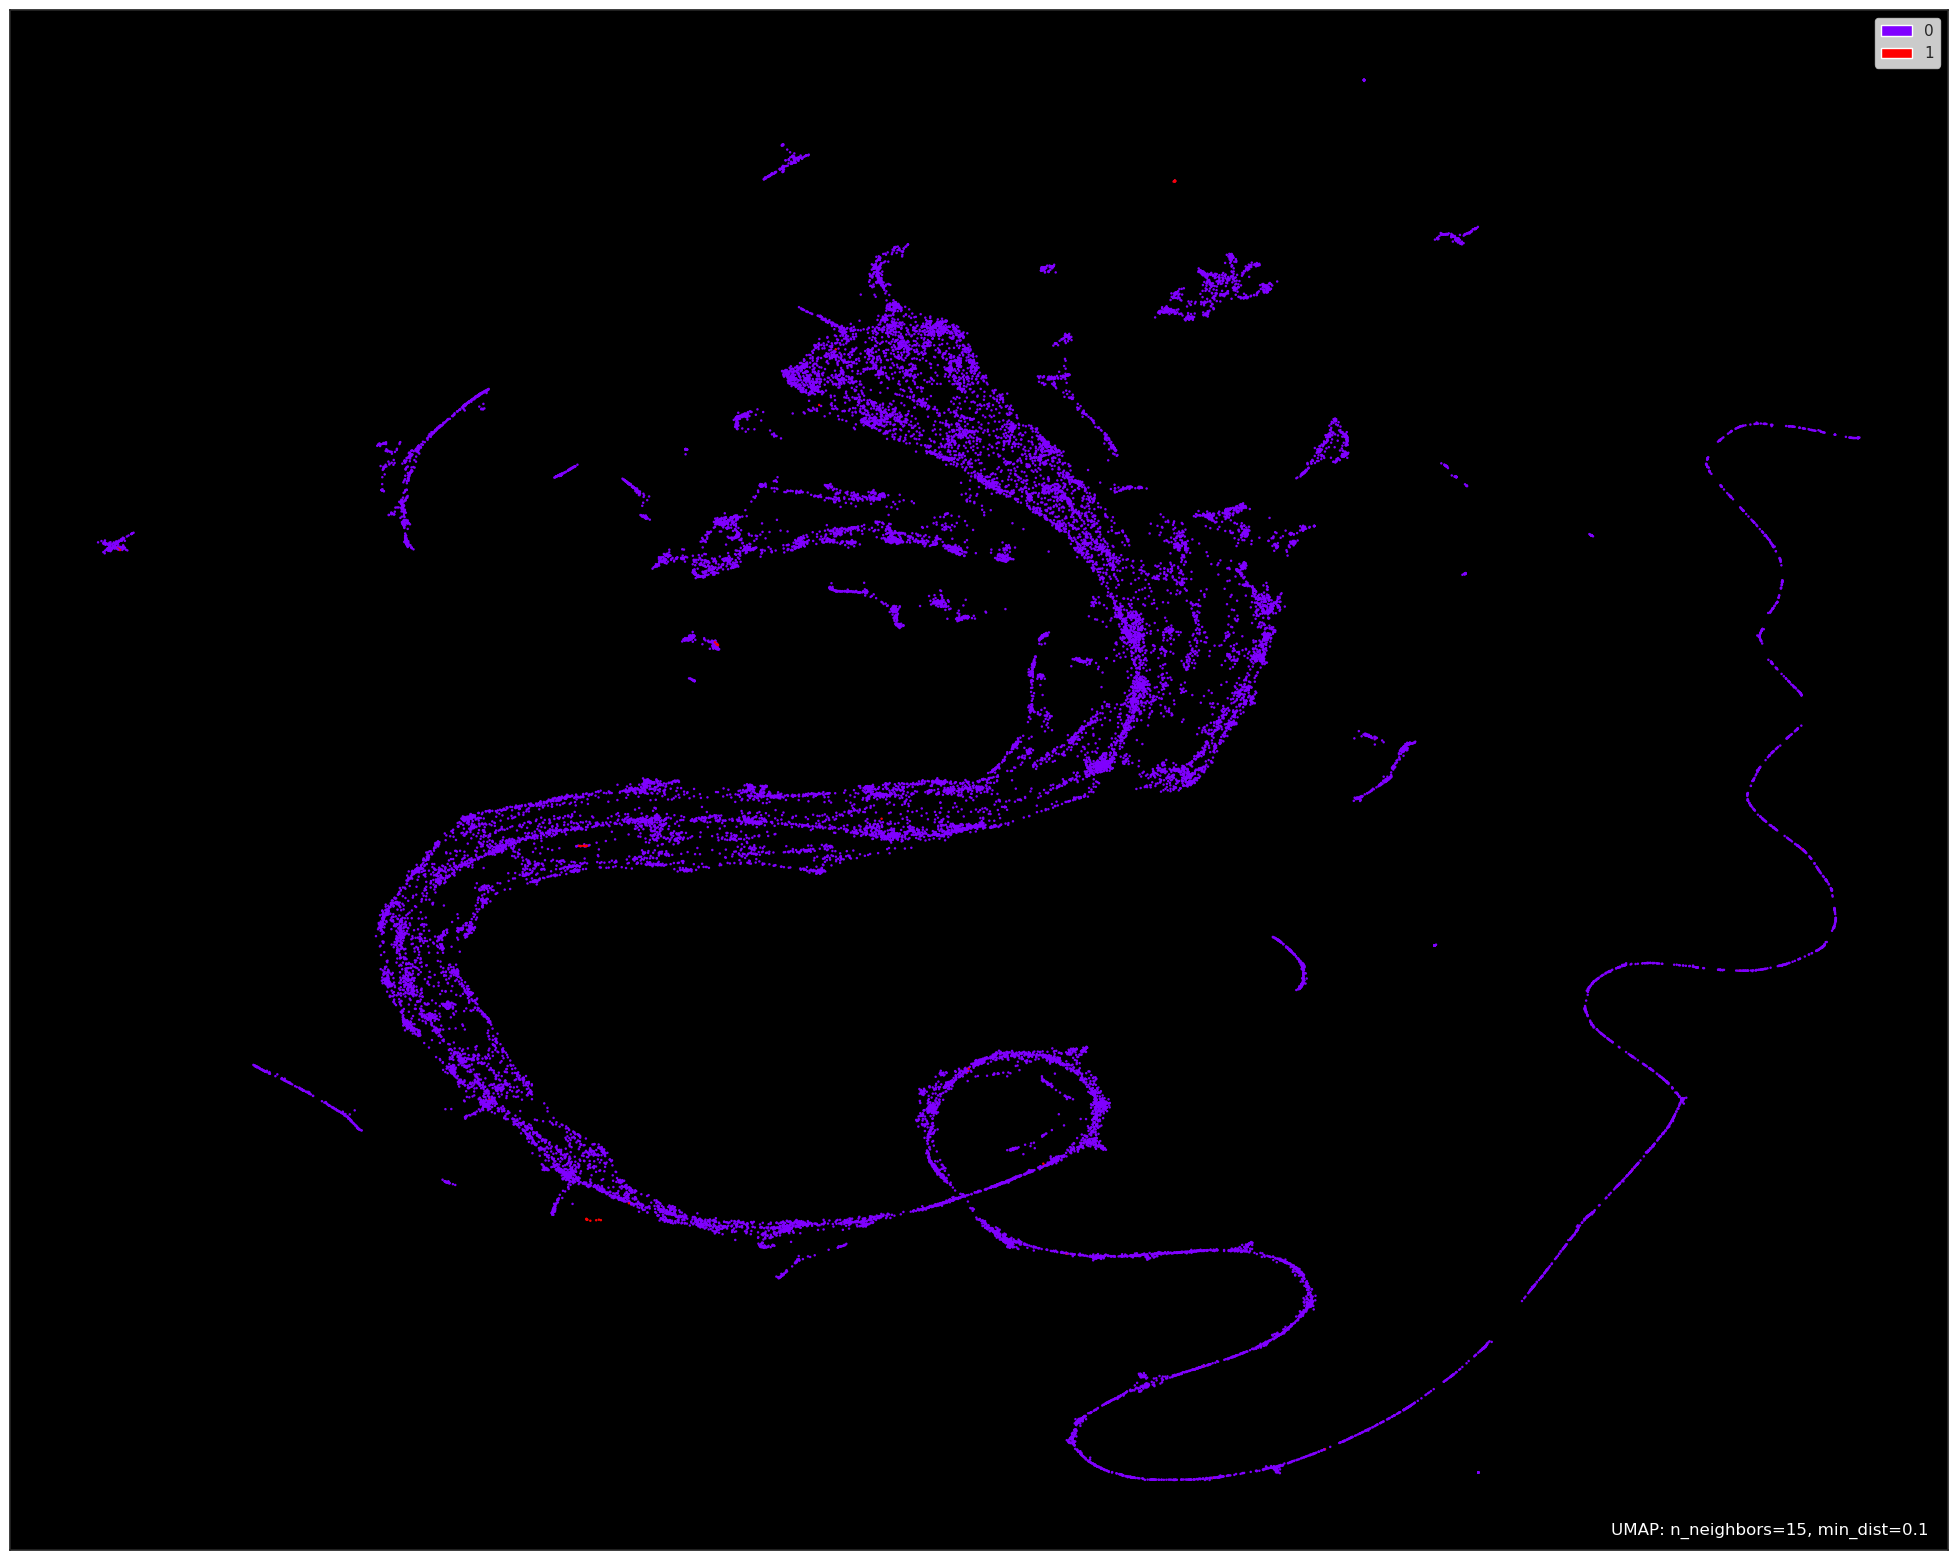

In [20]:
# Создаем объекты fig и ax, которые представляют фигуру и оси графика
# Параметр figsize=(25, 20) означает, что мы задаем размер фигуры в дюймах
fig, ax = plt.subplots(figsize=(25, 20))
# Используем функцию plot.points для построения точечного графика на основе данных, полученных от модели UMAP
# Параметр mapper - это объект, который хранит модель UMAP
# Параметр labels - это серия, которая хранит метки классов для транзакций (0 - не мошенническая, 1 - мошенническая)
# Параметр ax - это объект, который хранит оси графика
# Параметр theme='fire' означает, что мы выбираем цветовую схему "огонь" для графика
plot.points(mapper, labels=y_part2, ax=ax, theme='fire')

**Вывод**
> График показывает, что модель UMAP смогла разделить большинство транзакций по классам, но также есть некоторые смешанные области, где мошеннические и не мошеннические транзакции соседствуют друг с другом. Это может означать, что модель UMAP не совсем точна или что данные имеют сложную структуру, которая не может быть полностью отображена в двумерном пространстве. 